# Geo-Mapping using Basemap

## flight data from https://openflights.org/data.html

Here's what the general workflow will look like when working with two-dimensional maps:

- Create a new basemap instance with the specific map projection we want to use and how much of the map we want included.
- Convert spherical coordinates to Cartesian coordinates using the basemap instance.
- Use the matplotlib and basemap methods to customize the map.
- Display the map.

Let's focus on the first step and create a new basemap instance. To create a new instance of the basemap class, we call the basemap constructor and pass in values for the required parameters:

- projection: the map projection.
- llcrnrlat: latitude of lower left hand corner of the desired map domain
- urcrnrlat: latitude of upper right hand corner of the desired map domain
- llcrnrlon: longitude of lower left hand corner of the desired map domain
- urcrnrlon: longitude of upper right hand corner of the desired map domain

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
# data was imported from dataquest; original dataset is in a DAT format without column headers and read in one column
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')
geo_routes = pd.read_csv('geo_routes.csv')

In [3]:
airlines.head(2)

,id,name,alias,iata,icao,callsign,country,active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N


In [4]:
airports.head(2)

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby


In [5]:
routes.head(2)

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2


In [6]:
# this is how to create a Basemap instance
m = Basemap(projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

C:\Users\carlo\Anaconda3\envs\viz\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


In [7]:
# in order to convert lat and long to cartesian products we pass them to the m instance of basemap in this format
# x, y = m(longitudes, latitudes) but first we need to convert them to lists (basemap only accepts lists)

longitudes = airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()

x, y = m(longitudes, latitudes)

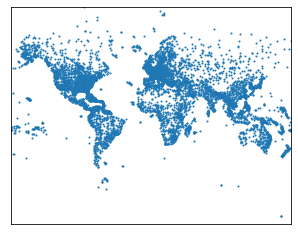

In [8]:
# to display the data as a scatter plot use m.scatter(x, y, s=n) 
m.scatter(x, y, s=1)
plt.show()

In [9]:
m.drawcoastlines??

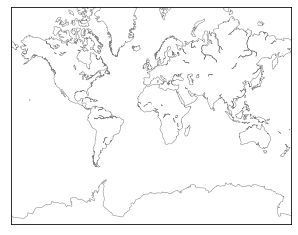

In [10]:
# to display coastlines use the basemap.drawcoastlines() methods

m.drawcoastlines(linewidth=0.5, color='grey')

C:\Users\carlo\Anaconda3\envs\viz\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


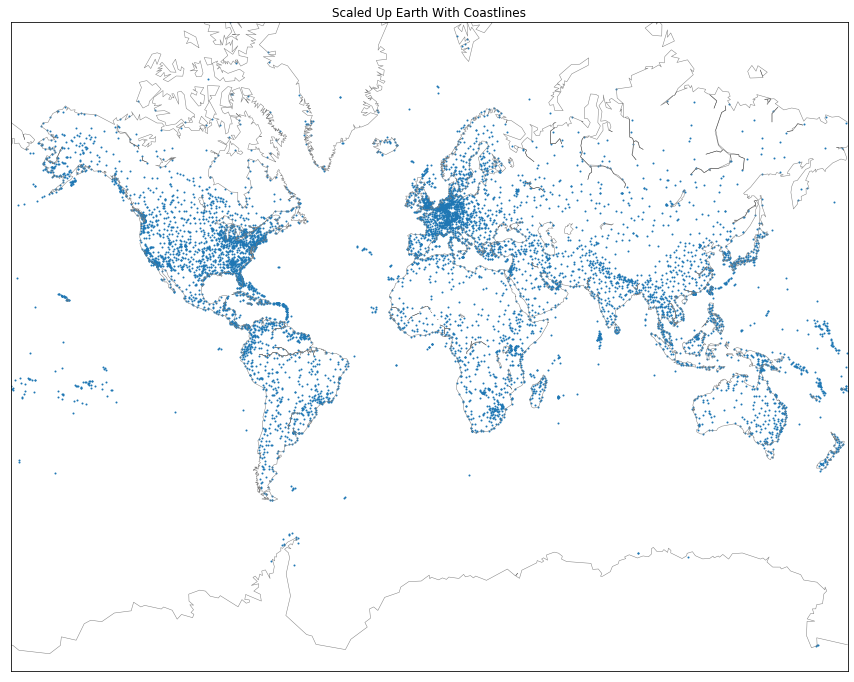

In [11]:
# map with title and bigger

fig, ax = plt.subplots(figsize=(15,20))
plt.title('Scaled Up Earth With Coastlines')
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines(linewidth=0.5, color='grey')
plt.show()

In [12]:
# function to filter for coordinates with an absolute difference less than 180 degrees
# basemap cannot handle differences largert than 180

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lat - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

In [13]:
m?

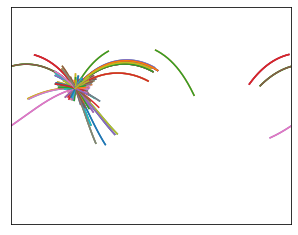

In [14]:
# creating a df for flights that originate in DfW and then running our function just on that DF
dfw = geo_routes[geo_routes['source'] == 'DFW']
create_great_circles(dfw)
plt.show()

C:\Users\carlo\Anaconda3\envs\viz\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


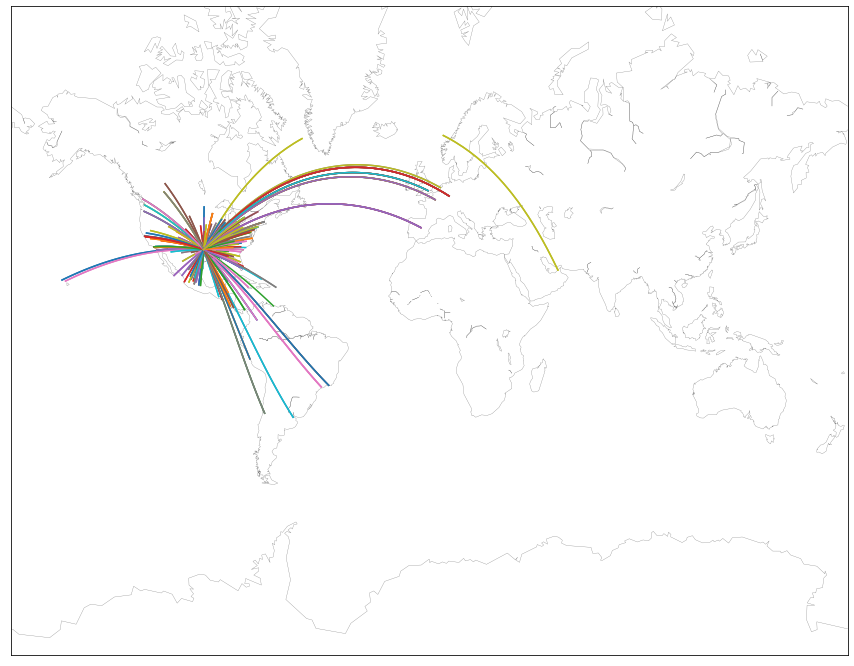

In [15]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines(linewidth=0.3, color='grey')

# here we write a function to draw circle arcs to be used with our dataset
def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)
                
dfw = geo_routes[geo_routes['source'] == 'DFW']
create_great_circles(dfw)
plt.show()

### I wasn't able to locate any parameters in basemap or in the drawgreatcircle method to control the color, width or other attributes of the line circles. However the visual provides a basic view of the result.